## Homework 10

## Import initial libraries (Move all libraries)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import os

### (Copy) Loading Census Tract Shape File ¶

In [2]:
# download= os.system("wget https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/fedhere/PUI2016_fb55/tree/master/Lab9_SRK325/Data")

In [3]:

shape_path="Data/CT_Shape/ct_shape.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index=ct_shape.BoroCT2010

### Coordinate systems, projections, and transformations 

In [4]:
#I have no idea what this is doing.  
ct_shape.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
NYC_Area=ct_shape.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) # from ft2 to mi2 
print 'total NYC land area: %s (mi^2)'%str(NYC_Area)[:5] # from ft2 to mi2 #epsg=2263 is US feet

total NYC land area: 302.3 (mi^2)


### Visualize the Cencus Tract boundaries colored by boroughs

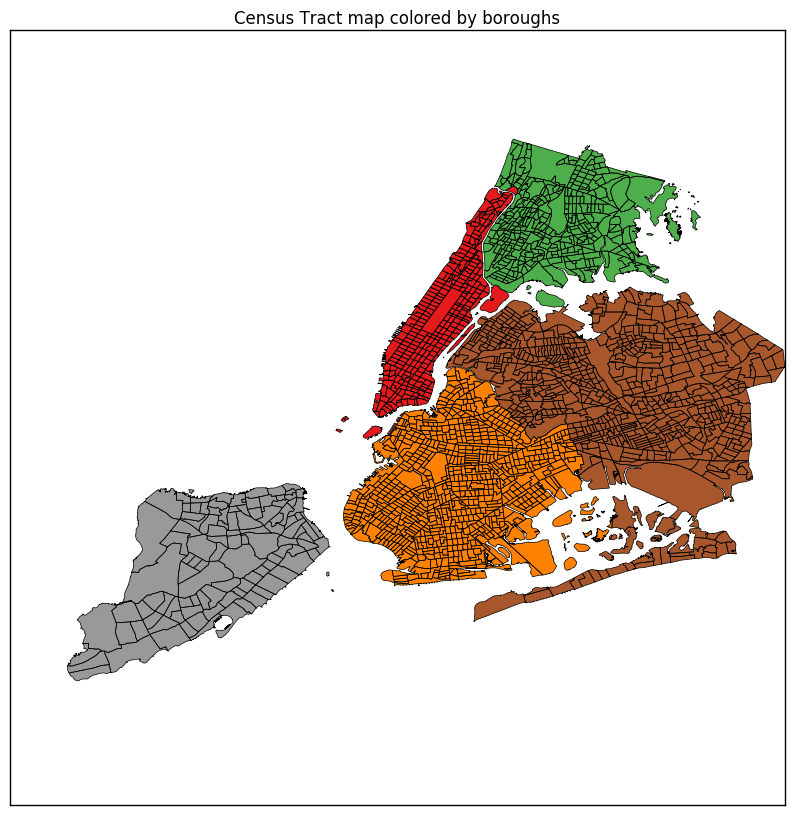

In [5]:
f, ax = plt.subplots(figsize=(10,10))
#how is this plotting?
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(column='BoroCode',alpha=1,linewidth=0.5,ax=ax)
plt.title("Census Tract map colored by boroughs")

### Map NYC Population density

#### Load Census Data for 2010

In [6]:
ct_data=DataFrame.from_csv('Data/ACS_CT2010.csv')
#set index to be the BoroCT2010 code
ct_data.index=ct_data.BoroCT2010.astype(str)

#### Add popuation density to CT shapefile

In [7]:
ct_shape_pop=ct_shape.join(ct_data[['SE_T002_002']]) #SE_T002_002 is population density in social explorer dataset

#### Vusualize the Population density for 2010

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


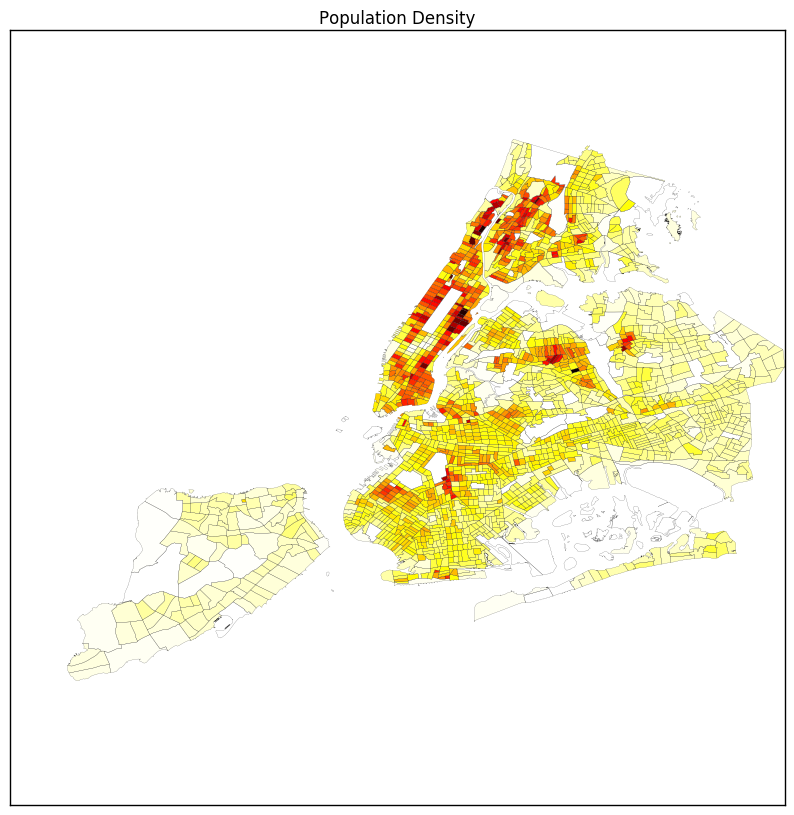

In [8]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_pop.plot(column='SE_T002_002',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Population Density")

## Explore CitiBike data

### Load CitiBike data

In [9]:
df_bike_monthly=DataFrame.from_csv('Data/CitiBike_monthly_byStation.csv')
df_bike_monthly.head(3)

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,2878,5258,9814,3739,7837,3206,2747,3590,4618,2885,...,0,0,0,0,0,0,0,0,0,0


# split seasons

In [10]:
#set index
df_bike_monthly.index

DatetimeIndex(['2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31',
               '2013-11-30', '2013-12-31', '2014-01-31', '2014-02-28',
               '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30',
               '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31',
               '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28',
               '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30',
               '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30'],
              dtype='datetime64[ns]', name=u'starttime', freq=None)

In [11]:
# Create monthly index
df_bike_monthly.index.month

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6], dtype=int32)

In [14]:
df_bike_monthly.head()

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,2878,5258,9814,3739,7837,3206,2747,3590,4618,2885,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,2920,4409,10456,3520,8928,3237,2530,3909,4169,2542,...,0,0,0,0,0,0,0,0,0,0
2013-11-30,1883,2731,6384,2446,5201,2085,1415,2727,3146,1539,...,0,0,0,0,0,0,0,0,0,0


Now there is three dataframes

### Time Series Aanalysis

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


(-200, 16000)

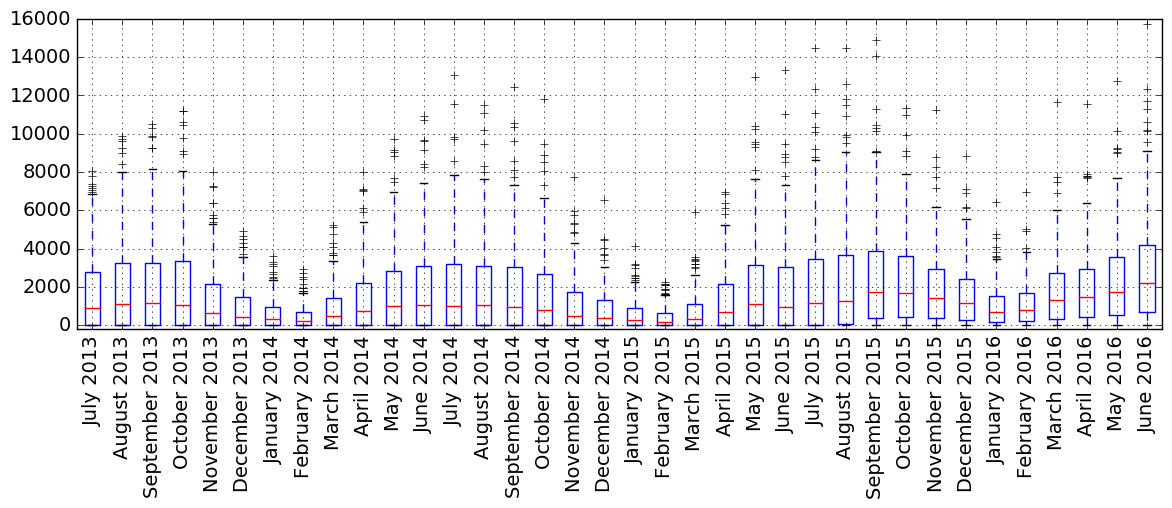

In [15]:
plt.rcParams['font.size']=14
f, ax = plt.subplots(figsize=(14,4))
#create a copy of the df for the viz purposes


df_bike_monthly_=df_bike_monthly.copy()
df_bike_monthly_.index=df_bike_monthly_.index.strftime("%B %Y")
df_bike_monthly_.T.boxplot(figsize=(15,7),ax=ax,rot=90);
ax.set_ylim([-200,16000])

#### Seasonal Decomposition

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


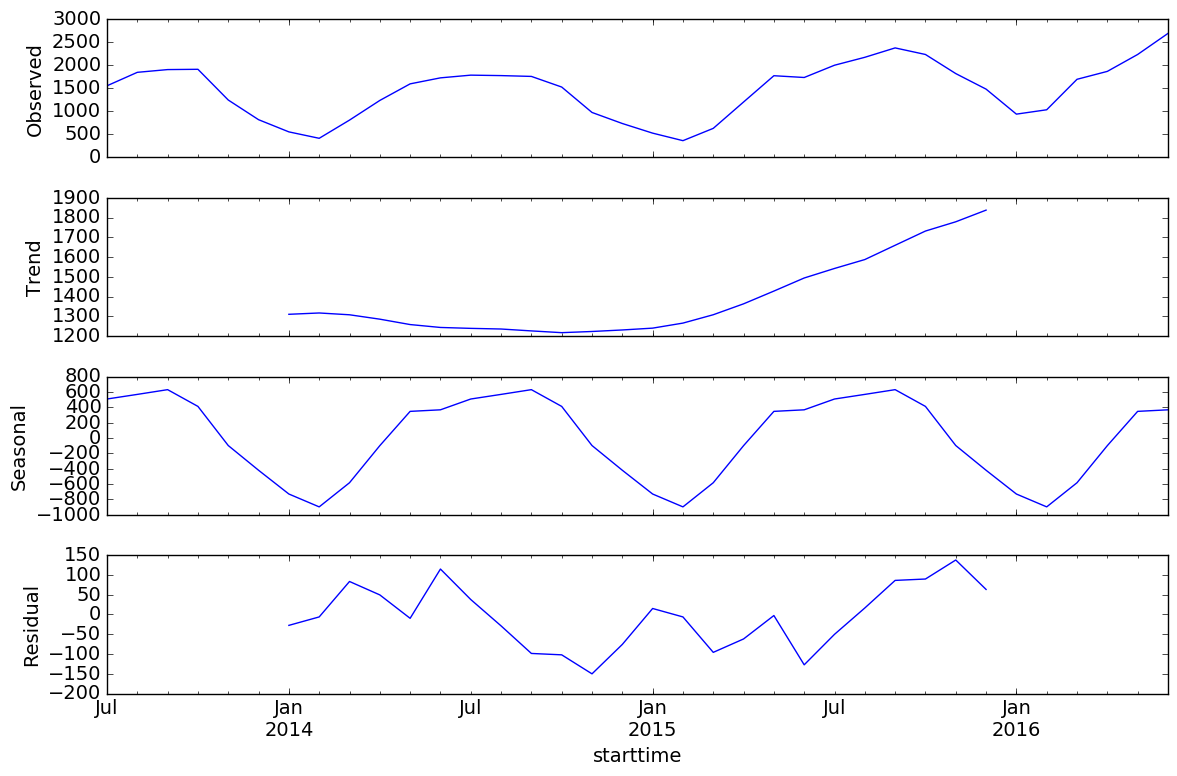

In [16]:
import statsmodels.api as sm

#Create a monthly time series of bike ride (Average of all citibike stations)
df_new=df_bike_monthly.mean(1).resample('M').mean()
df_new.interpolate(inplace=True)

#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(df_new.dropna())
plt.rcParams['figure.figsize']=(12,8)
resplot = res.plot()

## Map CitiBike Data to CT level

### Load CitiBike station location data

In [17]:
station_id=DataFrame.from_csv('Data/Station_id.csv')
#convert station_ids to string index
station_id.index=station_id.index.astype(str)
station_id.head()

,lat,lon
1000,40.753231,-73.970325
1001,40.749718,-74.002950
1002,40.730287,-73.990765
1003,40.718939,-73.992663
1004,40.734927,-73.992005


### Create CitiBike station Geometry (Point) from Corrdinates (Lat & Lon)

In [18]:
import shapely
# combine lat and lon to one column
station_id['lonlat']=zip(station_id.lon,station_id.lat)
# Create Point Geometry for based on lonlat column
station_id['geometry']=station_id[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
station_id.head()

,lat,lon,lonlat,geometry
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098)
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753)
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666)
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904)
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695)


### Intersect the two geometries

In [19]:
a=[]
# check for each citibike stations to see what CT they are belong to
for i in range(len(station_id)):
    a.append(ct_shape[ct_shape.geometry.intersects(station_id.iloc[i].geometry)].BoroCT2010.values[0])
    print '\r',"%",str((i+1)*100./len(station_id))[:4],
station_id['BoroCT2010']=a

% 100.


In [21]:
### Create average monthly rides column from monthly citibike data and add it to the station id which has the geometry
station_id['Summer'] = df_bike_monthly[5:8].sum()

In [22]:
### Create average monthly rides column from monthly citibike data and add it to the station id which has the geometry
station_id['Winter'] = df_bike_monthly.ix[[1,2,12],:].sum()

In [23]:
station_id.head()

,lat,lon,lonlat,geometry,BoroCT2010,Summer,Winter
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098),1009000,2905,7826
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753),1009900,3947,12903
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666),1005700,10179,28659
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904),1001800,3613,10681
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695),1006100,6774,21496


### Add Monthly rides to the station GeoDataFrame with CT code

In [25]:
### Create average monthly rides column from monthly citibike data and add it to the station id which has the geometry
temp=station_id[['Summer', "Winter"]]
temp['station_id']=station_id.index
temp.index=station_id['BoroCT2010']
ct_shape_MonthlyAve=ct_shape.join(temp)
ct_shape_MonthlyAve.fillna(0,inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


### Add the monthly average rides to the CT shapefile 

In [27]:
#add summer and winter to shapefile
temp=station_id[['Summer', "Winter"]]
temp['station_id']=station_id.index
temp.index=station_id['BoroCT2010']
ct_shape_MonthlyAve=ct_shape.join(temp)
ct_shape_MonthlyAve.fillna(0,inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


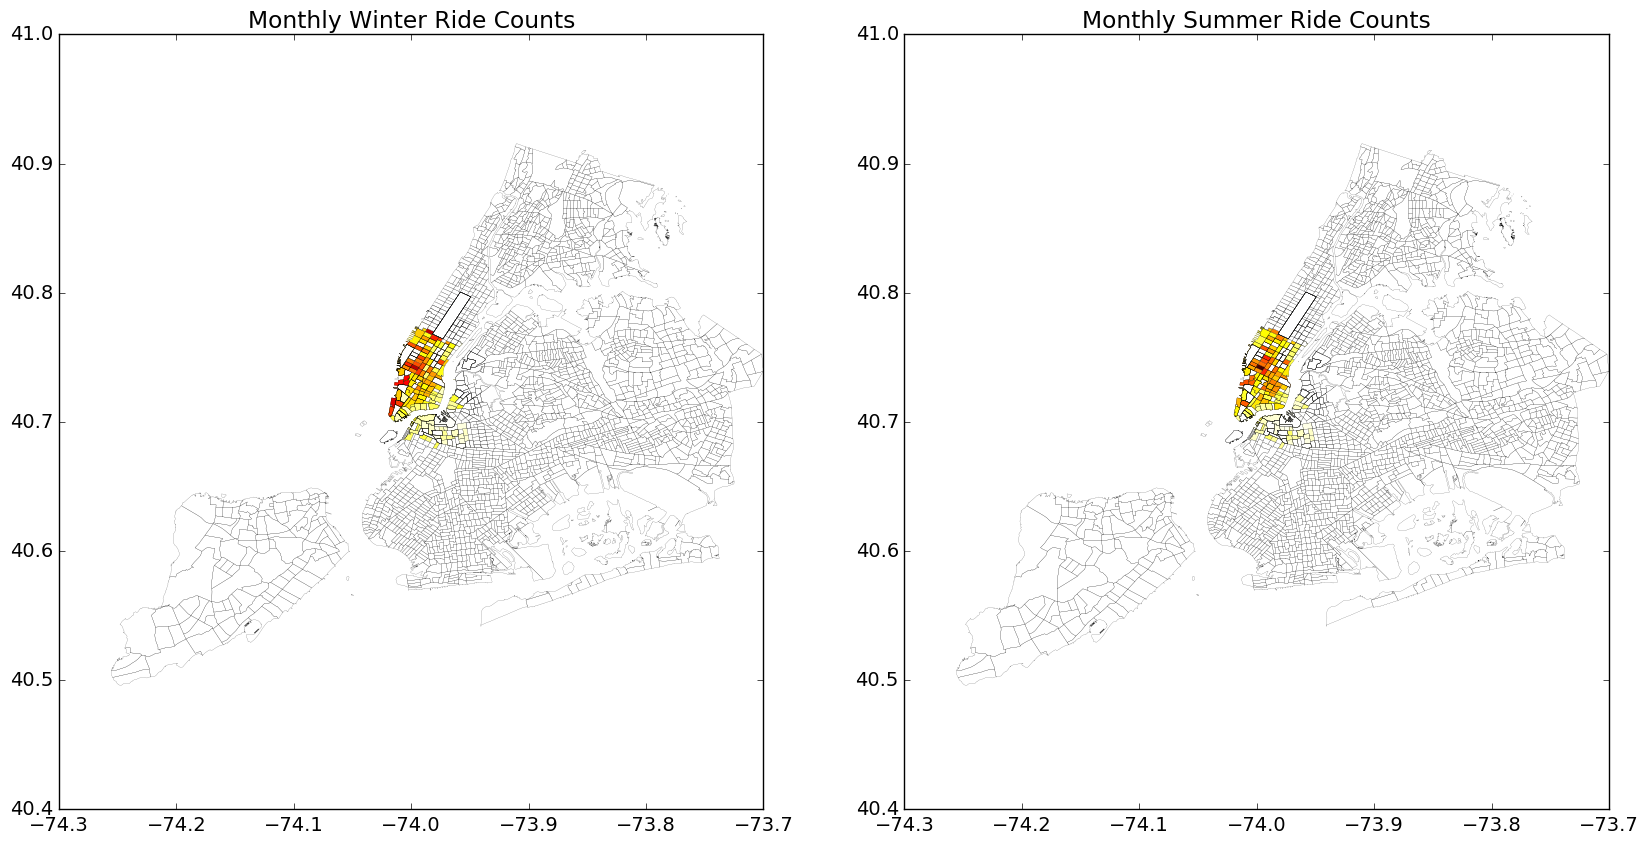

In [34]:
f, ax = plt.subplots(figsize=(20,10))
ax1 = plt.subplot(121)
ct_shape_MonthlyAve.plot(column='Winter',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax1)
plt.title("Monthly Winter Ride Counts")
ax2 = plt.subplot(122)
ct_shape_MonthlyAve.plot(column='Summer',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax2)
plt.title("Monthly Summer Ride Counts")

### Removing the CTs that are out of zoom boundries

In [35]:
ct_shape_MonthlyAve_Zoom=(ct_shape_MonthlyAve[ct_shape_MonthlyAve
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])

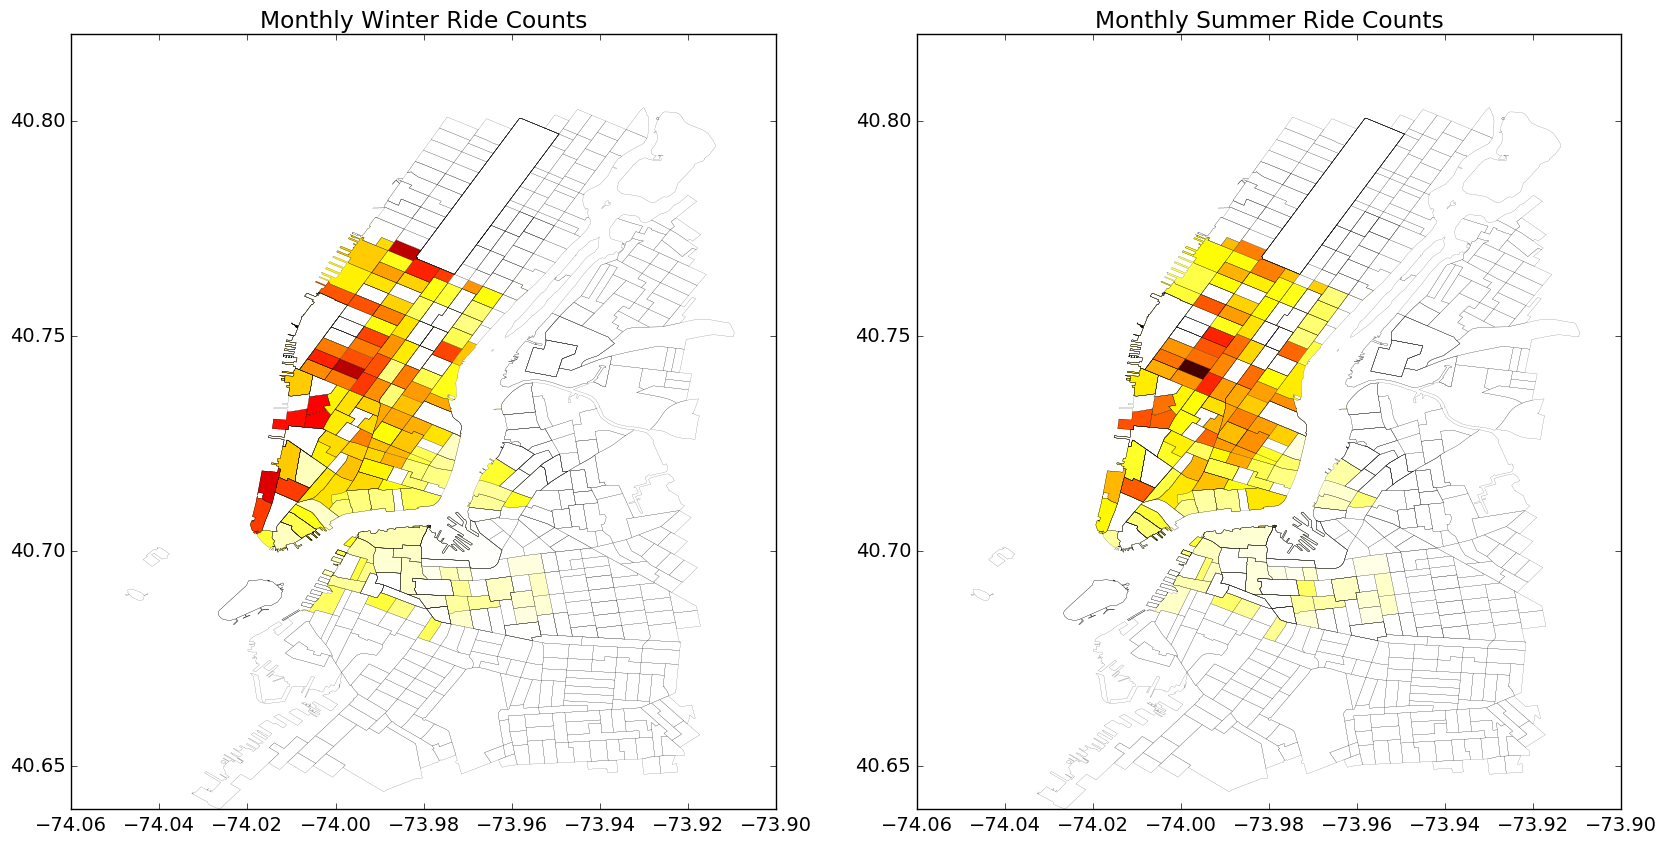

In [37]:
f, ax = plt.subplots(figsize=(20,10))
ax1 = plt.subplot(121)
ct_shape_MonthlyAve_Zoom.plot(column='Winter',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax1)
plt.title("Monthly Winter Ride Counts")
ax2 = plt.subplot(122)
ct_shape_MonthlyAve_Zoom.plot(column='Summer',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax2)
plt.title("Monthly Summer Ride Counts")

These maps contain the number of rides per census tract.  Some areas such as battery Park, Union Square, Washington Square, and Green Point have different ridership per season.  Not enough info is know to fully undderstand but I suspect it has to do with tourism levels in the tourist areas and proximity to CWF (City wide ferry) Stations which I remember has many riders travel to the docks on Citibike.  

### Export Shapefile CTs in the CitiBike Zone

In [38]:
path='Output/ct_shape_MonthlyAve_Zoom.shp'
ct_shape_MonthlyAve_Zoom.to_file(path)

## Exploratory Geospatial Analysis

In [39]:
import pysal as ps

### Spatial Weights
Contiguity: Queen Weights

In [40]:
qW_CT=ps.queen_from_shapefile(path)

Island id:  [0]


#### Neighbors of index10

In [41]:
qW_CT[10]

{1: 1.0, 8: 1.0, 9: 1.0, 18: 1.0, 19: 1.0, 30: 1.0, 37: 1.0, 38: 1.0, 39: 1.0}

In [42]:
qW_CT.cardinalities[10]

9

#### Matrix of Weights

In [43]:
Wmatrix, ids = qW_CT.full()

In [44]:
Wmatrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

#### Change the matrix to be row-standardized

In [45]:
qW_CT.transform = 'r'

### Spatial Lag  
Similarity of CT neibors can be meseard by means of spatial lag as follow:
$$BikeRideCountLag = \sum_j w_{i,j} BikeRideCount$$

In [46]:
Winter_MonthlyRide=ct_shape_MonthlyAve_Zoom.Winter
Winter_MonthlyRideLag=ps.lag_spatial(qW_CT, Winter_MonthlyRide)
Summer_MonthlyRide=ct_shape_MonthlyAve_Zoom.Summer
Summer_MonthlyRideLag=ps.lag_spatial(qW_CT, Summer_MonthlyRide)

In [47]:
Winter_MonthlyRideLagQ10 = ps.Quantiles(Winter_MonthlyRideLag, k=10)
Summer_MonthlyRideLagQ10 = ps.Quantiles(Summer_MonthlyRideLag, k=10)

In [49]:
Winter_MonthlyRideLagQ10

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               295
    0.000 < x[i] <=   522.556                24
  522.556 < x[i] <=  1495.100                79
 1495.100 < x[i] <=  2653.769                80
 2653.769 < x[i] <=  6236.388                79
 6236.388 < x[i] <=  9126.000                80
 9126.000 < x[i] <= 10562.276                79
10562.276 < x[i] <= 15390.857                80

In [50]:
Summer_MonthlyRideLagQ10

                  Quantiles                  
 
 Lower              Upper               Count
           x[i] <=    0.000               296
   0.000 < x[i] <=  109.278                28
 109.278 < x[i] <=  441.571                79
 441.571 < x[i] <=  815.000                75
 815.000 < x[i] <= 2176.367                79
2176.367 < x[i] <= 2860.250                81
2860.250 < x[i] <= 3434.625                78
3434.625 < x[i] <= 5474.857                80

#### Map them

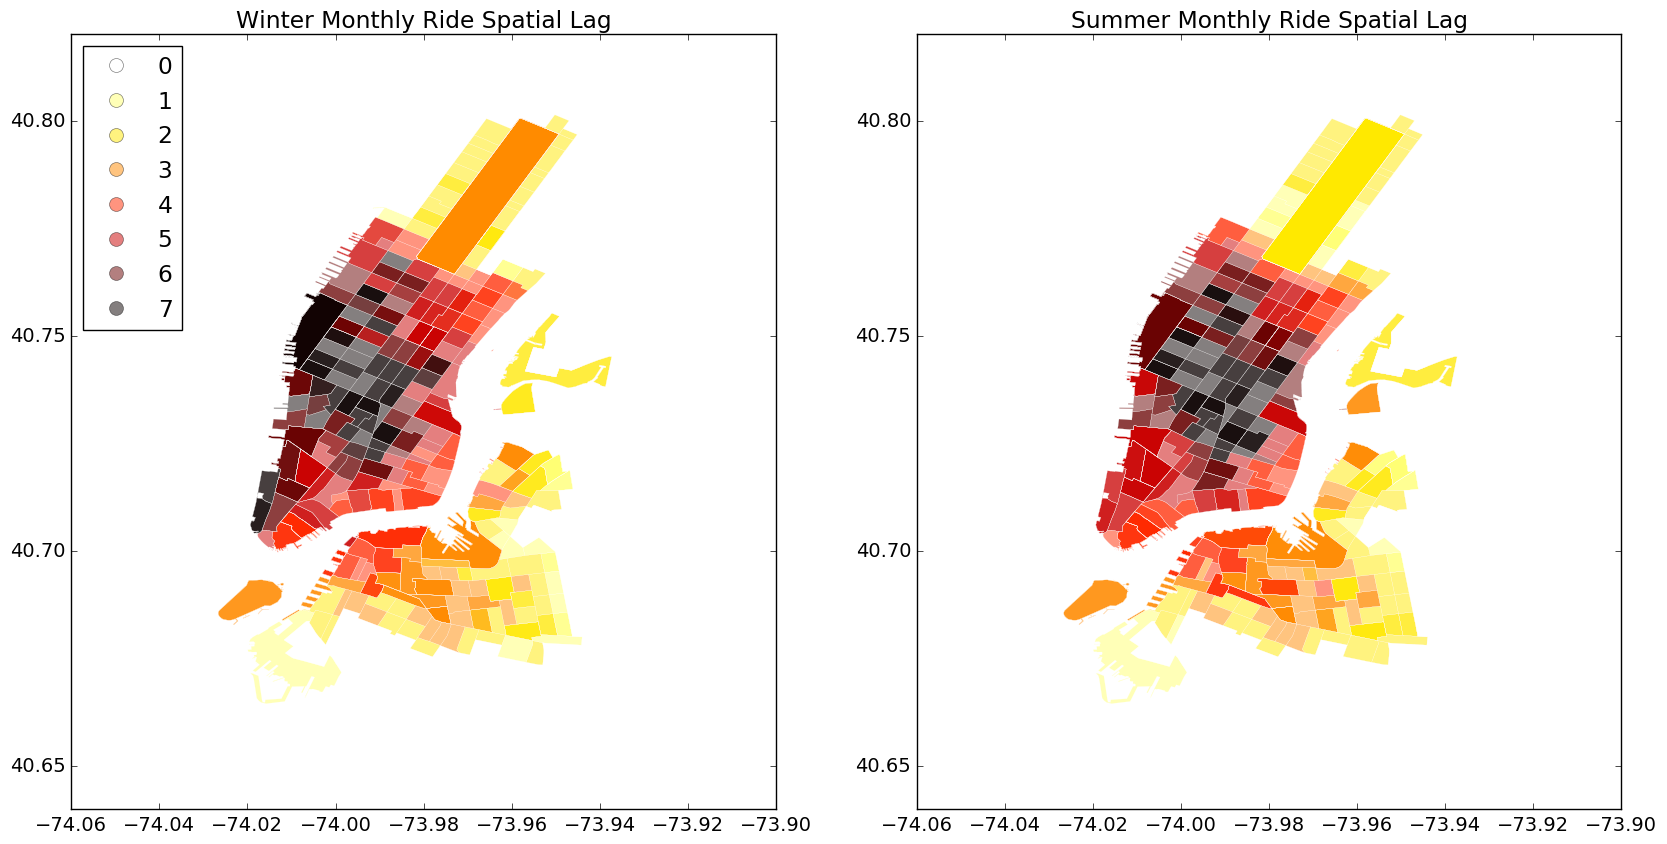

In [51]:

f, ax = plt.subplots(figsize=(20, 10))
ax1 = plt.subplot(121)
ct_shape_MonthlyAve_Zoom.assign(cl=Winter_MonthlyRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax1, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Winter Monthly Ride Spatial Lag")

ax2 = plt.subplot(122)
ct_shape_MonthlyAve_Zoom.assign(cl=Summer_MonthlyRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax2, 
        edgecolor='white', legend=False)
ax.set_axis_off()
plt.title("Summer Monthly Ride Spatial Lag")

In [53]:
b1,a1 = np.polyfit(Summer_MonthlyRide, Summer_MonthlyRideLag, 1)
#second series for winter
b2,a2 = np.polyfit(Winter_MonthlyRide, Winter_MonthlyRideLag, 1)



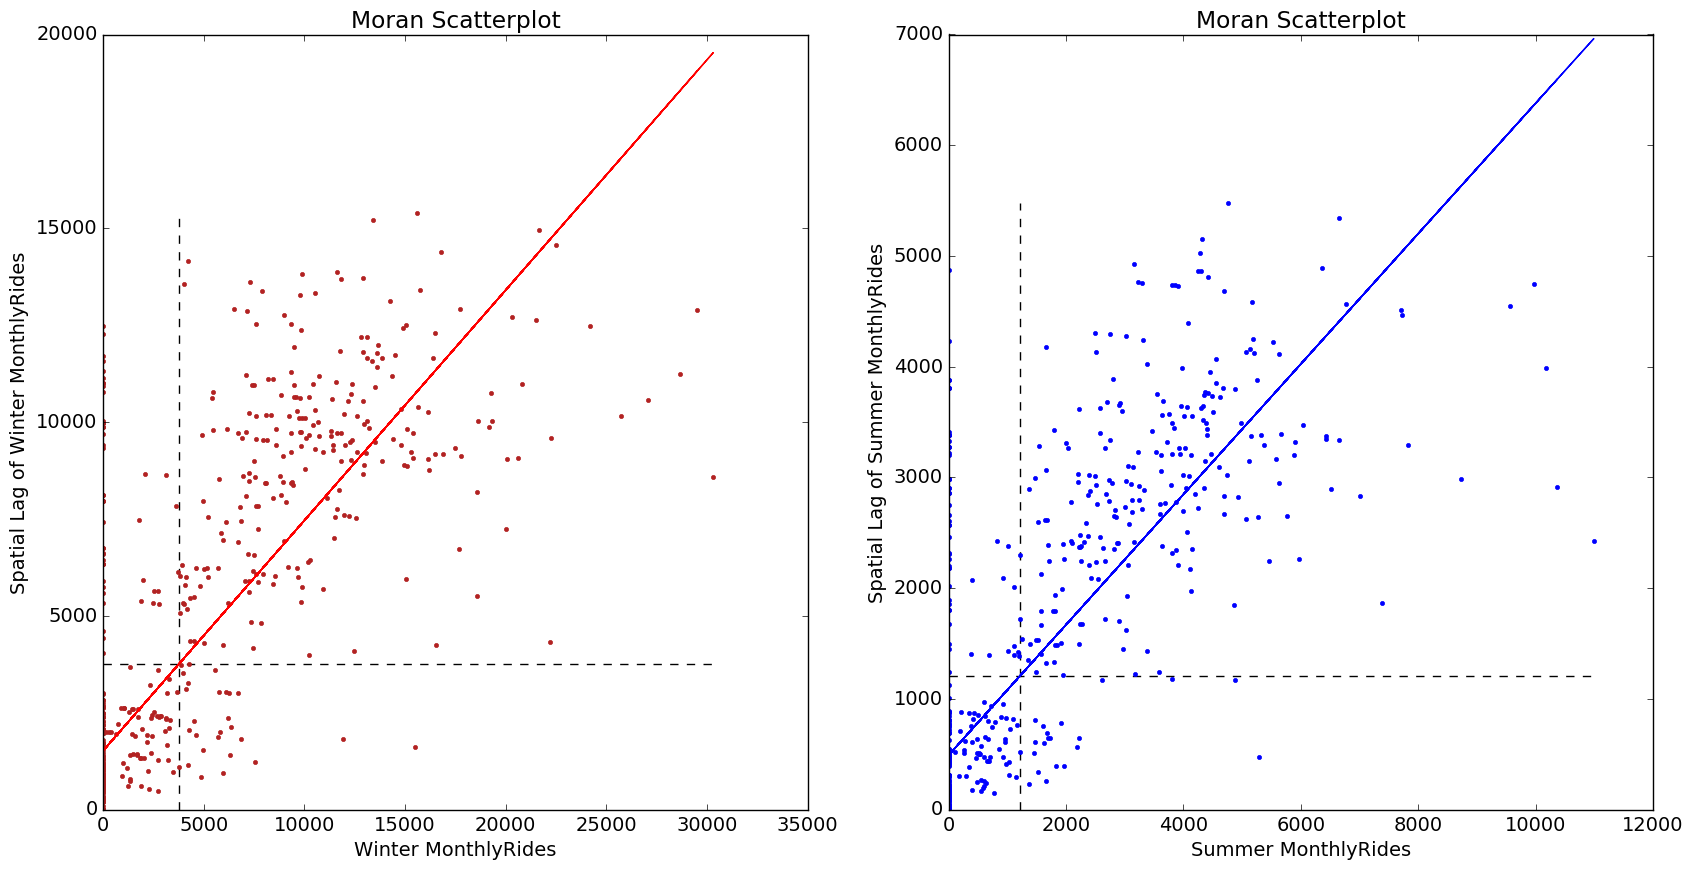

In [55]:

f, ax = plt.subplots(1, figsize=(20, 10))

ax1 = plt.subplot(122)
plt.plot(Summer_MonthlyRide, Summer_MonthlyRideLag, '.', color='blue')
 # dashed vert at mean of the last year's PCI
plt.vlines(Summer_MonthlyRide.mean(), Summer_MonthlyRideLag.min(), Summer_MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(Summer_MonthlyRideLag.mean(), Summer_MonthlyRide.min(), Summer_MonthlyRide.max(), linestyle='--')
# red line of best fit using global I as slope
plt.plot(Summer_MonthlyRide, a1 + b1*Summer_MonthlyRide, 'b')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Summer MonthlyRides')
plt.xlabel('Summer MonthlyRides')


ax2 = plt.subplot(121)
plt.plot(Winter_MonthlyRide, Winter_MonthlyRideLag, '.', color='firebrick')
 # dashed vert at mean of the last year's PCI
plt.vlines(Winter_MonthlyRide.mean(), Winter_MonthlyRideLag.min(), Winter_MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(Winter_MonthlyRideLag.mean(), Winter_MonthlyRide.min(), Winter_MonthlyRide.max(), linestyle='--')
# red line of best fit using global I as slope
plt.plot(Winter_MonthlyRide, a2 + b2*Winter_MonthlyRide, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Winter MonthlyRides')
plt.xlabel('Winter MonthlyRides')


### Moran's I

In [56]:
I_Winter_MonthlyRide = ps.Moran(Winter_MonthlyRide, qW_CT)
I_Summer_MonthlyRide = ps.Moran(Summer_MonthlyRide, qW_CT)

In [57]:
I_Winter_MonthlyRide.I, I_Winter_MonthlyRide.p_sim

(0.59454602293066428, 0.001)

In [58]:
I_Summer_MonthlyRide.I, I_Summer_MonthlyRide.p_sim

(0.58918714022588814, 0.001)

In [59]:
I_Winter_MonthlyRide.sim[0:10]

array([ 0.01788026,  0.01955687,  0.00649002, -0.01402506,  0.01068502,
        0.00530414,  0.0034924 , -0.00866126, -0.03536617, -0.00478778])

In [60]:
I_Summer_MonthlyRide.sim[0:10]

array([ 0.0085543 , -0.00205628,  0.00376497, -0.00081138, -0.00567618,
       -0.01075179, -0.02301688,  0.01204648, -0.03001036, -0.01526689])

### KDEplot of all of the simulated points
the vertical line shows the observed value

In [61]:

import seaborn as sns
plt.rcParams['figure.figsize']=(14,3)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


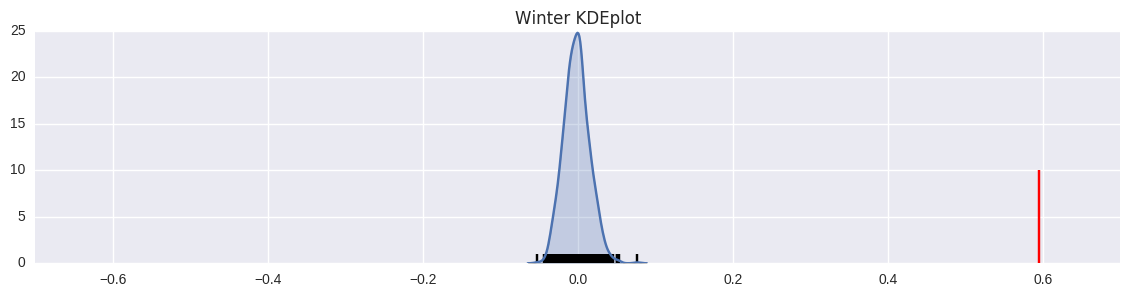

In [64]:

sns.kdeplot(I_Winter_MonthlyRide.sim, shade=True)
plt.vlines(I_Winter_MonthlyRide.sim, 0, 1)
plt.vlines(I_Winter_MonthlyRide.I, 0, 10, 'r')
plt.xlim([-.70, .70])
plt.title('Winter KDEplot')

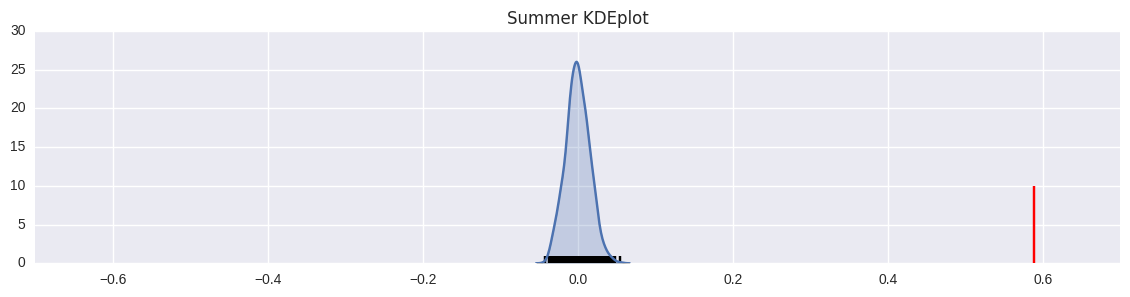

In [65]:
sns.kdeplot(I_Summer_MonthlyRide.sim, shade=True)
plt.vlines(I_Summer_MonthlyRide.sim, 0, 1)
plt.vlines(I_Summer_MonthlyRide.I, 0, 10, 'r')
plt.xlim([-.70, .70])
plt.title('Summer KDEplot')

In the following figure the vertical line is showing if our $I$ statistic were close to our expected value

(-0.7, 0.7)

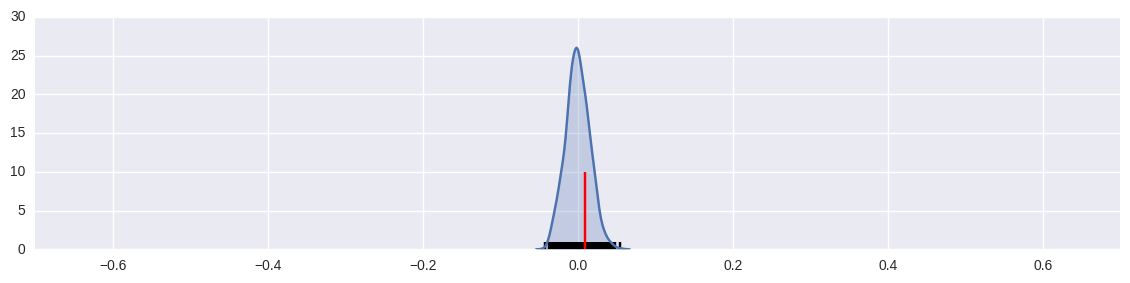

In [66]:

sns.kdeplot(I_Summer_MonthlyRide.sim, shade=True)
plt.vlines(I_Summer_MonthlyRide.sim, 0, 1)
plt.vlines(I_Summer_MonthlyRide.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])

(-0.7, 0.7)

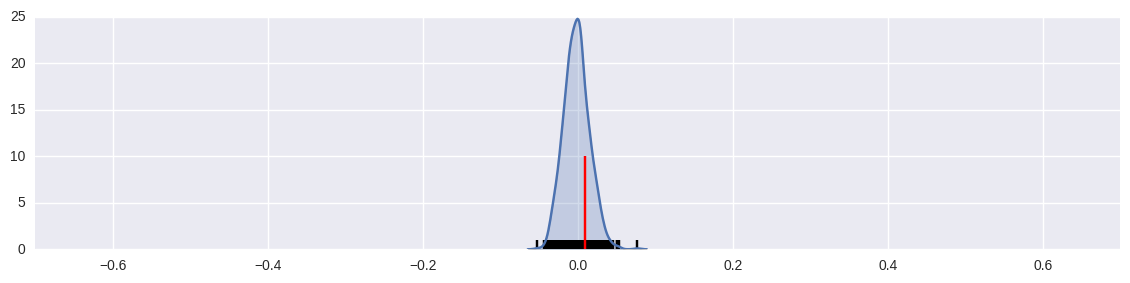

In [67]:
sns.kdeplot(I_Winter_MonthlyRide.sim, shade=True)
plt.vlines(I_Winter_MonthlyRide.sim, 0, 1)
plt.vlines(I_Winter_MonthlyRide.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])

## Local  Spatial Autocorrelation

In [70]:
LMo_MonthlyRide_summer = ps.Moran_Local(np.array(Summer_MonthlyRide), qW_CT, permutations=999)
LMo_MonthlyRide_winter = ps.Moran_Local(np.array(Winter_MonthlyRide), qW_CT, permutations=999)

In [71]:
LMo_MonthlyRide_summer.Is[0:5], LMo_MonthlyRide_summer.p_sim[0:5]

(array([-0.        , -0.34378404, -0.00477208,  0.01870022,  0.00170449]),
 array([ 0.001,  0.089,  0.335,  0.408,  0.457]))

In [72]:
LMo_MonthlyRide_winter.Is[0:5], LMo_MonthlyRide_winter.p_sim[0:5]

(array([-0.        , -0.20761294,  0.00956291,  0.01282182,  0.02001483]),
 array([ 0.001,  0.179,  0.341,  0.338,  0.328]))

### LISA (Local Indicators of Spatial Autocorrelation)

In [73]:
Wsigs = Winter_MonthlyRide[LMo_MonthlyRide_winter.p_sim <= .001]
W_sigs = Winter_MonthlyRideLag[LMo_MonthlyRide_winter.p_sim <= .001]
Winsigs = Winter_MonthlyRide[LMo_MonthlyRide_winter.p_sim > .001]
W_insigs = Winter_MonthlyRideLag[LMo_MonthlyRide_winter.p_sim > .001]

Ssigs = Summer_MonthlyRide[LMo_MonthlyRide_summer.p_sim <= .001]
S_sigs = Summer_MonthlyRideLag[LMo_MonthlyRide_summer.p_sim <= .001]
Sinsigs = Summer_MonthlyRide[LMo_MonthlyRide_summer.p_sim > .001]
S_insigs = Summer_MonthlyRideLag[LMo_MonthlyRide_summer.p_sim > .001]

### Plot Signficant LISA

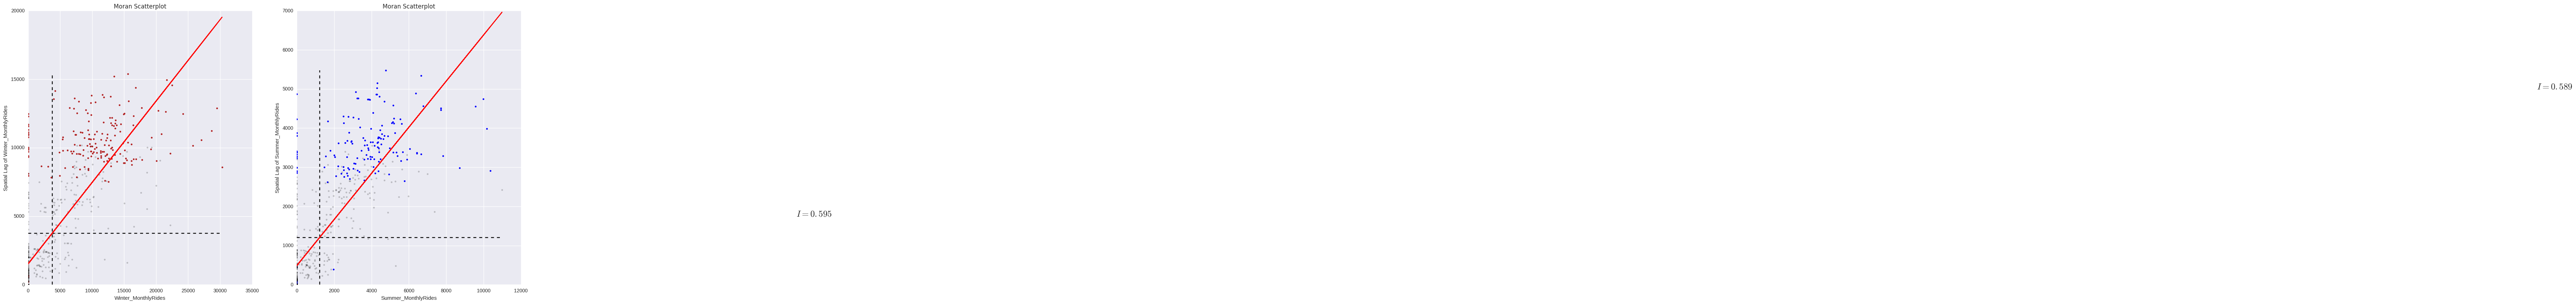

In [76]:
f, ax = plt.subplots(figsize=(18, 10))

ax1 = plt.subplot(121)
plt.plot(Wsigs, W_sigs, '.', color='firebrick')
plt.plot(Winsigs, W_insigs, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_Winter_MonthlyRide.I, x=120000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(Winter_MonthlyRide.mean(), Winter_MonthlyRideLag.min(), Winter_MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(Winter_MonthlyRideLag.mean(), Winter_MonthlyRide.min(), Winter_MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(Winter_MonthlyRide, a2 + b2*Winter_MonthlyRide, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Winter_MonthlyRides')
plt.xlabel('Winter_MonthlyRides')



ax2 = plt.subplot(122)
plt.plot(Ssigs, S_sigs, '.', color='blue')
plt.plot(Sinsigs, S_insigs, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_Summer_MonthlyRide.I, x=120000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(Summer_MonthlyRide.mean(), Summer_MonthlyRideLag.min(), Summer_MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(Summer_MonthlyRideLag.mean(), Summer_MonthlyRide.min(), Summer_MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(Summer_MonthlyRide, a1 + b1*Summer_MonthlyRide, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Summer_MonthlyRides')
plt.xlabel('Summer_MonthlyRides')

Winter ridership has a stronger coorelation.  

In [78]:
Wsig = LMo_MonthlyRide_winter.p_sim < 0.01
Whotspots = LMo_MonthlyRide_winter.q==1 * Wsig
Wcoldspots = LMo_MonthlyRide_winter.q==3 * Wsig
print ("Number of Hotspots Winter:", Whotspots.sum())
print ("Number of Coldspots Winter:", Wcoldspots.sum())
Ssig = LMo_MonthlyRide_summer.p_sim < 0.01
Shotspots = LMo_MonthlyRide_summer.q==1 * Ssig
Scoldspots = LMo_MonthlyRide_summer.q==3 * Ssig
print ("Number of Hotspots (Summer):", Shotspots.sum())
print ("Number of Coldspots (Summer):", Scoldspots.sum())

('Number of Hotspots Winter:', 183)
('Number of Coldspots Winter:', 328)
('Number of Hotspots (Summer):', 180)
('Number of Coldspots (Summer):', 168)


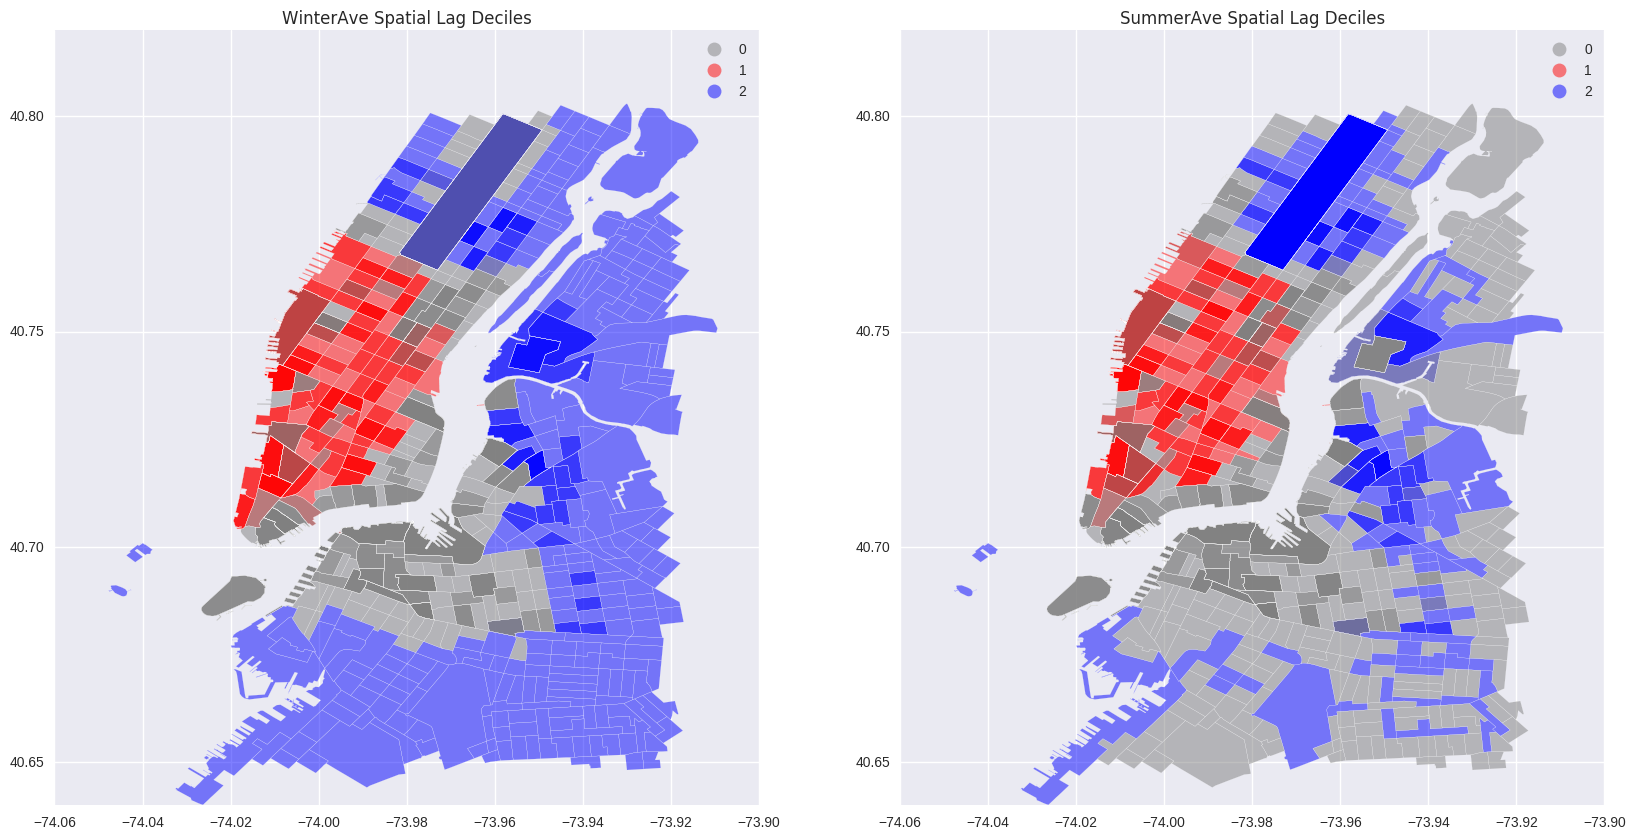

In [80]:
from matplotlib import colors

Whcmap = colors.ListedColormap(['grey','red','blue'])
Whotcold = Whotspots*1 + Wcoldspots*2
Shcmap = colors.ListedColormap(['grey','red','blue'])
Shotcold = Shotspots*1 + Scoldspots*2

f, ax = plt.subplots(figsize=(20, 10))
ax1 = plt.subplot(121)
ct_shape_MonthlyAve_Zoom.assign(cl=Whotcold).plot(column='cl', categorical=True, 
        k=10, cmap=Whcmap, linewidth=0.1, ax=ax1, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("WinterAve Spatial Lag Deciles")

ax2 = plt.subplot(122)
ct_shape_MonthlyAve_Zoom.assign(cl=Shotcold).plot(column='cl', categorical=True, 
        k=10, cmap=Shcmap, linewidth=0.1, ax=ax2, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("SummerAve Spatial Lag Deciles")

Context of color scale:
Red= ride frequent ridership and high pepherial ridership. 
Grey= frequent ridership and low pepherial ridership. 
Blue= infrequent ridership and low pepherial ridership. 
 
Analysis: 
